In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [85]:
from platform import python_version

print(python_version())

3.8.5


## 1. Анализ стратегий

Для термов размера n = [1,18] сравним редукции в различных стратегиях. Будем сравнивать не на всех возможных случайных термах, а только на тех, которые начинаются не абстракцией (потому что они уже в нормальной форме в соответствии со стратегиями вызова оп имени  изначению). Из-за того, что при n = 10 количество возможных термов увеличивается больше, чем на миллион, будем делать так: При n <= 9 берутся все термы (начинающиеся не абстракцией), для n от 10 до 12 включительно - случайные 500к (начинающиеся не абстракцией), от 13 до 15 - 250к (начинающиеся не абстракцией), от 16 до 18 - 100к(начинающиеся не абстракцией). 

In [40]:
norm_df = pd.read_csv('normal_strat.csv')
val_df = pd.read_csv('call_by_value.csv')
name_df = pd.read_csv('call_by_name.csv')

In [151]:
norm_df.shape

(2706735, 11)

In [152]:
val_df.shape

(2706735, 11)

In [153]:
name_df.shape

(2706735, 11)

In [2]:
# saving file do not show labels
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12}

rcParams['font.family'] = 'Times New Roman'
rcParams['font.weight'] = 'normal'
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (7, 5)

# plt.rc('font', **font)
def draw_and_save_three_lines_graph(x, y, z, xlabel, ylabel, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_xlabel(xlabel, **font)
#     axes.set_ylabel(ylabel, **font)
    sns.lineplot(x=x_data, ax = axes, y=x, label = 'Нормальная стратегия')    
    sns.lineplot(x=x_data, ax = axes, y=y, label = 'Вызов по имени')
    sns.lineplot(x=x_data, ax = axes, y=z, label = 'Вызов по значению')
    plt.legend(loc = 'best')
    plt.legend(prop=font)
    
    if (output_name is not None):
        fig.tight_layout()
        fig.savefig('results/' + output_name + '.svg', bbox_inches='tight')
        
        
def draw_and_save_one_line_graph(x, xlabel, ylabel, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_xlabel(xlabel, **font)
#     axes.set_ylabel(ylabel, **font)
    sns.lineplot(x=x_data, ax = axes, y=x)
#     plt.legend(loc = 'best')
#     plt.legend(prop=font)

    if (output_name is not None):
        fig.tight_layout()
        fig.savefig('results/' + output_name + '.svg', bbox_inches='tight')
    

 #### 1. Средняя длина цепочки редукций для каждой стратегии

In [42]:
average_len_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_len_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_len_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_len_norm[term_size - 1] = np.mean(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)]['steps_count'])
    average_len_name[term_size - 1] = np.mean(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)]['steps_count'])
    average_len_val[term_size - 1] = np.mean(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)]['steps_count'])

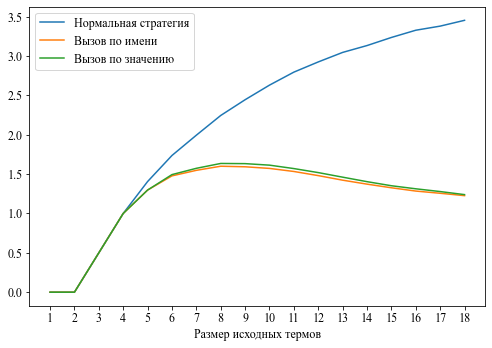

In [72]:
draw_and_save_three_lines_graph(average_len_norm, average_len_name, average_len_val,
                               "Размер исходных термов", "Среднее количество шагов редукции", norm_df['size_of_term'].unique(),
                               "strategies/Average_steps_count")

 #### 2. Средняя длина цепочки редукций для каждой стратегии, где вызов по имени и вызов по значению привели терм к нормальной форме в соответствии с нормальной стратегий

In [44]:
average_len2_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_len2_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_len2_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_len2_norm[term_size - 1] = np.mean(norm_df[(norm_df['size_of_term'] == term_size)
                                                       &(norm_df['has_normal_form'] == True)
                                                       &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['steps_count'])
    
    average_len2_name[term_size - 1] = np.mean(name_df[(name_df['size_of_term'] == term_size)
                                                       &(name_df['has_normal_form'] == True)
                                                       &(name_df['is_same_norm'] == True)
                                                       &(name_df['is_same_val'] == True)
                                                       &(name_df['is_same_name'] == True)]['steps_count'])
    
    average_len2_val[term_size - 1] = np.mean(val_df[(val_df['size_of_term'] == term_size)
                                                       &(val_df['has_normal_form'] == True)
                                                       &(val_df['is_same_norm'] == True)
                                                       &(val_df['is_same_val'] == True)
                                                       &(val_df['is_same_name'] == True)]['steps_count'])

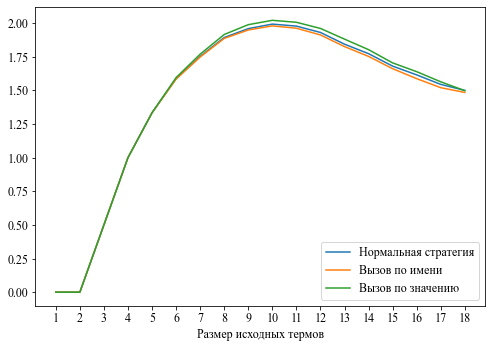

In [73]:
draw_and_save_three_lines_graph(average_len2_norm, average_len2_name, average_len2_val,
                               "Размер исходных термов", "Среднее количество шагов редукции", norm_df['size_of_term'].unique(),
                               "strategies/Average_steps_count_same_normal_form")

 #### 3. Средний размер редуцированных термов для каждой стратегии

In [46]:
average_size_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_size_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_size_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_size_norm[term_size - 1] = np.mean(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)]['size_reduced'])
    average_size_name[term_size - 1] = np.mean(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)]['size_reduced'])
    average_size_val[term_size - 1] = np.mean(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)]['size_reduced'])

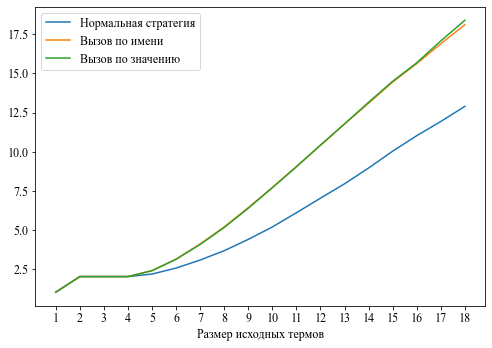

In [74]:
draw_and_save_three_lines_graph(average_size_norm, average_size_name, average_size_val,
                               "Размер исходных термов", "Средний размер редуцированного терма", norm_df['size_of_term'].unique(),
                               "strategies/Average_reduced_term_size")

 #### 4. [Бесполезный] Средний размер редуцированных термов для каждой стратегии, где вызов по имени и вызов по значению привели терм к нормальной форме в соответствии с нормальной стратегий

In [75]:
average_size2_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_size2_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_size2_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_size2_norm[term_size - 1] = np.mean(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)
                                                      &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_reduced'])
    average_size2_name[term_size - 1] = np.mean(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)
                                                      &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_reduced'])
    average_size2_val[term_size - 1] = np.mean(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)
                                                    &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_reduced'])

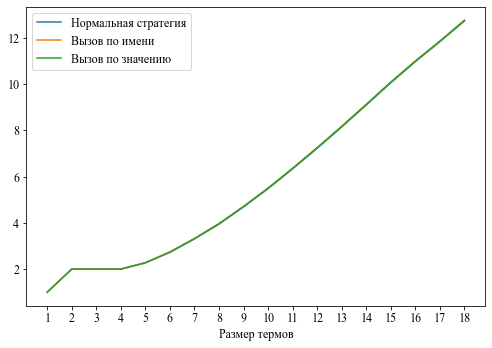

In [76]:
draw_and_save_three_lines_graph(average_size2_norm, average_size2_name, average_size2_val,
                               "Размер термов", "Средний размер редуцированного терма", norm_df['size_of_term'].unique(),
                               "Average_reduced_term_size_same_normal_form")

#### 5. Среднее значение максимальных размеров термов во время редукции для каждой стратегии

In [51]:
average_maxsize_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_maxsize_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_maxsize_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_maxsize_norm[term_size - 1] = np.mean(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)]['size_biggest_term_in_steps'])
    average_maxsize_name[term_size - 1] = np.mean(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)]['size_biggest_term_in_steps'])
    average_maxsize_val[term_size - 1] = np.mean(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)]['size_biggest_term_in_steps'])

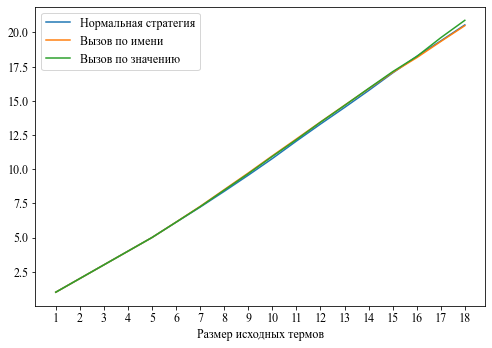

In [77]:
draw_and_save_three_lines_graph(average_maxsize_norm, average_maxsize_name, average_maxsize_val,
                               "Размер исходных термов", "Средний максимальный размер терма во время редукции", norm_df['size_of_term'].unique(),
                               "strategies/Average_max_term_size")

#### 6. Среднее значение максимальных размеров термов во время редукции для каждой стратегии, где вызов по имени и вызов по значению привели терм к нормальной форме в соответствии с нормальной стратегий

In [84]:
average_maxsize2_norm

array([ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,
        6.125     ,  7.21869489,  8.3093199 ,  9.37742098, 10.44349033,
       11.48695267, 12.50388535, 13.48756745, 14.49121501, 15.44717458,
       16.49864752, 17.41308676, 18.4338941 ])

In [83]:
norm_df[norm_df['size_biggest_term_in_steps'] < norm_df['size_of_term']]

,size_of_term,number_of_term,steps_count,size_biggest_term_in_steps,size_reduced,cycled_reduction,increasing_reduction,has_normal_form,is_same_norm,is_same_val,is_same_name


In [53]:
average_maxsize2_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_maxsize2_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_maxsize2_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_maxsize2_norm[term_size - 1] = np.mean(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)
                                                          &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_biggest_term_in_steps'])
    
    average_maxsize2_name[term_size - 1] = np.mean(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)
                                                          &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_biggest_term_in_steps'])
    
    average_maxsize2_val[term_size - 1] = np.mean(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)&(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_biggest_term_in_steps'])

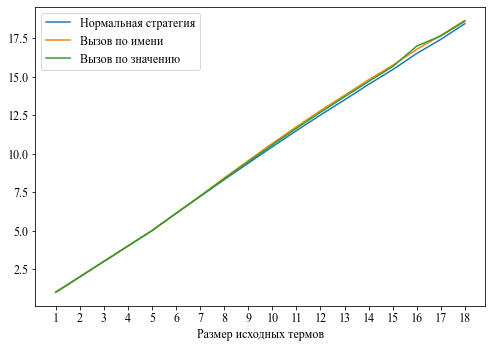

In [78]:
draw_and_save_three_lines_graph(average_maxsize2_norm, average_maxsize2_name, average_maxsize2_val,
                               "Размер исходных термов", "Средний размер редуцированного терма", norm_df['size_of_term'].unique(),
                               "strategies/Average_max_term_size_same_normal_form")

#### 7. Максимальное значение максимальных размеров термов во время редукции для каждой стратегии

In [55]:
max_maxsize_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
max_maxsize_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
max_maxsize_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    max_maxsize_norm[term_size - 1] = np.max(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)]['size_biggest_term_in_steps'])
    max_maxsize_name[term_size - 1] = np.max(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)]['size_biggest_term_in_steps'])
    max_maxsize_val[term_size - 1] = np.max(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)]['size_biggest_term_in_steps'])
    

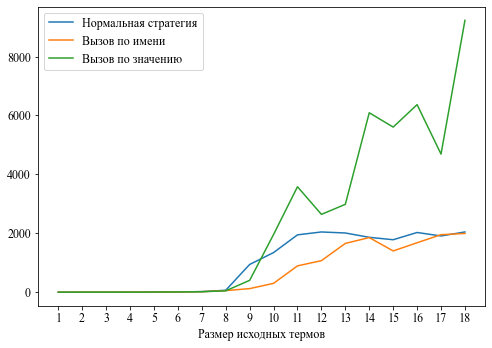

In [79]:
draw_and_save_three_lines_graph(max_maxsize_norm, max_maxsize_name, max_maxsize_val,
                               "Размер исходных термов", "Максимальный размер терма во время редукции", norm_df['size_of_term'].unique(),
                               "strategies/Max_max_term_size")

#### 8. Максимальное значение максимальных размеров термов во время редукции для каждой стратегии, где вызов по имени и вызов по значению привели терм к нормальной форме в соответствии с нормальной стратегий

In [58]:
max_maxsize2_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
max_maxsize2_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
max_maxsize2_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    max_maxsize2_norm[term_size - 1] = np.max(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)
                                                     &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_biggest_term_in_steps'])
    
    max_maxsize2_name[term_size - 1] = np.max(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)
                                                     &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_biggest_term_in_steps'])
    
    max_maxsize2_val[term_size - 1] = np.max(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)
                                                   &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_biggest_term_in_steps'])
    

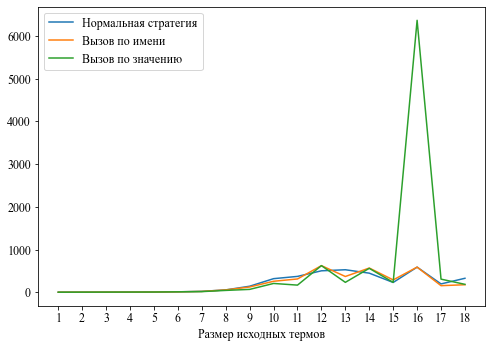

In [80]:
draw_and_save_three_lines_graph(max_maxsize2_norm, max_maxsize2_name, max_maxsize2_val,
                               "Размер исходных термов", "Максимальный размер терма во время редукции", norm_df['size_of_term'].unique(),
                               "strategies/Max_max_term_size_same_normal_form")

In [402]:
val_df[val_df['size_of_term'] == 16]['size_biggest_term_in_steps'].dropna().sort_values()

2406735      16.0
2498732      16.0
2498733      16.0
2462337      16.0
2498734      16.0
            ...  
2452441    1505.0
2455591    1510.0
2452199    1557.0
2455334    1685.0
2456106    6367.0
Name: size_biggest_term_in_steps, Length: 99196, dtype: float64

In [403]:
val_df.iloc[2456106]

size_of_term                               16
number_of_term                929710003503755
steps_count                              36.0
size_biggest_term_in_steps             6367.0
size_reduced                              1.0
cycled_reduction                        False
increasing_reduction                    False
has_normal_form                          True
is_same_norm                             True
is_same_val                              True
is_same_name                             True
Name: 2456106, dtype: object

In [408]:
name_df.iloc[2456106]

size_of_term                               16
number_of_term                929710003503755
steps_count                               7.0
size_biggest_term_in_steps               51.0
size_reduced                              1.0
cycled_reduction                        False
increasing_reduction                    False
has_normal_form                          True
is_same_norm                             True
is_same_val                              True
is_same_name                             True
Name: 2456106, dtype: object

In [409]:
norm_df.iloc[2456106]

size_of_term                               16
number_of_term                929710003503755
steps_count                               7.0
size_biggest_term_in_steps               34.0
size_reduced                              1.0
cycled_reduction                        False
increasing_reduction                    False
has_normal_form                          True
is_same_norm                             True
is_same_val                              True
is_same_name                             True
Name: 2456106, dtype: object

#### 9. Доля термов, результат редукции которых совпадает во всех 3 стратегиях

#### 10. Доля термов, результат редукции которых совпадает для каждой пары стратегий.

9-10 на одном графике отобразим

In [60]:
precent_all_same = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
precent_norm_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
precent_norm_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
precent_val_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    cnt_all_same =  norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)
                                                     &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)].shape[0]
    
    precent_all_same[term_size - 1] = cnt_all_same / norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)].shape[0]
    
    cnt_norm_val_same =  norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)
                                                     &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)].shape[0]
    
    precent_norm_val[term_size - 1] = cnt_norm_val_same / norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)].shape[0]    
    
    
    cnt_norm_name_same =  norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)
                                                     &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_name'] == True)].shape[0]
    
    precent_norm_name[term_size - 1] = cnt_norm_name_same / norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)].shape[0]    
    
    
    cnt_val_name_same =  val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)
                                                     &(val_df['is_same_name'] == True)
                                                       &(val_df['is_same_val'] == True)].shape[0]
    
    precent_val_name[term_size - 1] = cnt_val_name_same / val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)].shape[0]    
    
   
    

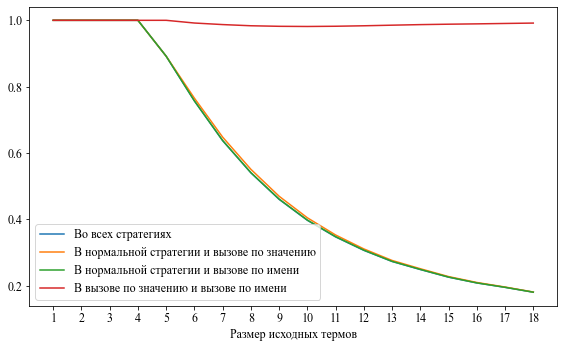

In [65]:
fig, axes = plt.subplots(ncols=1,nrows=1, figsize = (8, 5))
axes.set_xticks(norm_df['size_of_term'].unique())
axes.set_xlabel('Размер исходных термов', **font)
# axes.set_ylabel('Доля термов, дающих одинаковый результат в различных стратегиях', **font)
sns.lineplot(x=norm_df['size_of_term'].unique(), ax = axes, y=precent_all_same, label = 'Во всех стратегиях')    
sns.lineplot(x=norm_df['size_of_term'].unique(), ax = axes, y=precent_norm_val, label = 'В нормальной стратегии и вызове по значению')
sns.lineplot(x=norm_df['size_of_term'].unique(), ax = axes, y=precent_norm_name, label = 'В нормальной стратегии и вызове по имени')
sns.lineplot(x=norm_df['size_of_term'].unique(), ax = axes, y=precent_val_name, label = 'В вызове по значению и вызове по имени')
plt.legend(loc = 'best')
plt.legend(prop=font)

fig.tight_layout()
fig.savefig('results/strategies/Precent_same_reduced_terms' + '.svg', bbox_inches='tight')

#### 11. Доля термов, не имеющих нормальную форму в своей стратегии, среди всех термов для каждой стратегии

In [66]:
precent_no_nf_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
precent_no_nf_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
precent_no_nf_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    precent_no_nf_norm[term_size-1] =  (norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == False)].shape[0]) / (norm_df[(norm_df['size_of_term'] == term_size)].shape[0])
    
    precent_no_nf_val[term_size-1] =  (val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == False)].shape[0]) / (val_df[(val_df['size_of_term'] == term_size)].shape[0])
  

    precent_no_nf_name[term_size-1] =  (name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == False)].shape[0]) / (name_df[(norm_df['size_of_term'] == term_size)].shape[0])

    

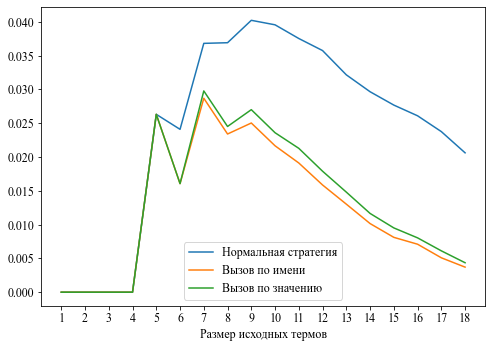

In [67]:
draw_and_save_three_lines_graph(precent_no_nf_norm, precent_no_nf_name, precent_no_nf_val,
                               "Размер исходных термов", "Доля термов без нормальной формы среди всех термов", norm_df['size_of_term'].unique(),
                               "strategies/Precent_no_nf_term")

#### 12. Доля термов среди термов без нормальной формы, которые не имеют нормальной формы так как "расходятся" для каждой стратегии

In [ ]:
cnt_to_skip = 4
precent_increasing_full = np.zeros(shape = len(normal_forms_df['size_of_term'].unique())- cnt_to_skip, dtype=float)

for term_size in range(cnt_to_skip, len(normal_forms_df['size_of_term'].unique())):
    precent_increasing_full[term_size - cnt_to_skip] = (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)
                                                                         &(normal_forms_df['increasing_reduction'] == True)].shape[0]
                                             ) / (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)].shape[0])
    
    
draw_and_save_one_line_graph(precent_increasing_full,
                               "Размер исходных термов", "Доля развертывающихся термов среди термов без нормальной формы",
                                np.apply_along_axis(lambda x: x + cnt_to_skip, 0, normal_forms_df['size_of_term'].unique()[:len(normal_forms_df['size_of_term'].unique())- cnt_to_skip]),
                               "just_normal/Precent_increasing_full")

In [86]:
cnt_to_skip = 4
precent_increase_val = np.zeros(shape = len(norm_df['size_of_term'].unique())- cnt_to_skip, dtype=float)
precent_increase_norm = np.zeros(shape = len(norm_df['size_of_term'].unique())- cnt_to_skip, dtype=float)
precent_increase_name = np.zeros(shape = len(norm_df['size_of_term'].unique())- cnt_to_skip, dtype=float)

for term_size in range(cnt_to_skip, len(norm_df['size_of_term'].unique())):
    precent_increase_norm[term_size - cnt_to_skip] =  (norm_df[(norm_df['size_of_term'] == term_size + 1) &
                                                  (norm_df['has_normal_form'] == False)
                                                     &(norm_df['increasing_reduction'] == True)].shape[0]) / (norm_df[(norm_df['size_of_term'] == term_size + 1) 
                                                                                                                    &(norm_df['has_normal_form'] == False)].shape[0])
    
    precent_increase_val[term_size - cnt_to_skip] =  (val_df[(val_df['size_of_term'] == term_size + 1) &
                                                  (val_df['has_normal_form'] == False)
                                                     &(val_df['increasing_reduction'] == True)].shape[0]) / (val_df[(val_df['size_of_term'] == term_size + 1) 
                                                                                                                    &(val_df['has_normal_form'] == False)].shape[0])
    
    precent_increase_name[term_size - cnt_to_skip] =  (name_df[(name_df['size_of_term'] == term_size + 1) &
                                                  (name_df['has_normal_form'] == False)
                                                     &(name_df['increasing_reduction'] == True)].shape[0]) / (name_df[(name_df['size_of_term'] == term_size + 1) 
                                                                                                                    &(name_df['has_normal_form'] == False)].shape[0])
   
    

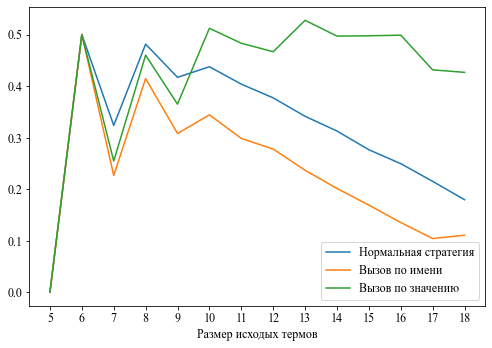

In [90]:
draw_and_save_three_lines_graph(precent_increase_norm, precent_increase_name, precent_increase_val,
                               "Размер исходых термов", "Доля развертывающихся термов среди всех термов, не имеющих нормальную форму",
                                np.apply_along_axis(lambda x: x + cnt_to_skip, 0, norm_df['size_of_term'].unique()[:len(norm_df['size_of_term'].unique())- cnt_to_skip]),
                               "strategies/Precent_increasing_term")

#### 13. Доля термов среди термов без нормальной формы, которые не имеют нормальной формы так как "зацикливаются" для каждой стратегии

In [91]:
cnt_to_skip = 4
precent_cycled_val = np.zeros(shape = len(norm_df['size_of_term'].unique())- cnt_to_skip, dtype=float)
precent_cycled_norm = np.zeros(shape = len(norm_df['size_of_term'].unique())- cnt_to_skip, dtype=float)
precent_cycled_name = np.zeros(shape = len(norm_df['size_of_term'].unique())- cnt_to_skip, dtype=float)

for term_size in range(cnt_to_skip, len(norm_df['size_of_term'].unique())):
    precent_cycled_norm[term_size - cnt_to_skip] =  (norm_df[(norm_df['size_of_term'] == term_size + 1) &
                                                  (norm_df['has_normal_form'] == False)
                                                     &(norm_df['cycled_reduction'] == True)]
                                                     .shape[0]) / (norm_df[(norm_df['size_of_term'] == term_size + 1)
                                                                           &(norm_df['has_normal_form'] == False)].shape[0])
    
    precent_cycled_val[term_size - cnt_to_skip] =  (val_df[(val_df['size_of_term'] == term_size + 1) &
                                                  (val_df['has_normal_form'] == False)
                                                     &(val_df['cycled_reduction'] == True)]
                                                    .shape[0]) / (val_df[(val_df['size_of_term'] == term_size + 1)
                                                                         &(val_df['has_normal_form'] == False)].shape[0])
    
    precent_cycled_name[term_size - cnt_to_skip] =  ( name_df[(name_df['size_of_term'] == term_size + 1) &
                                                  (name_df['has_normal_form'] == False)
                                                     &(name_df['cycled_reduction'] == True)].
                                                     shape[0]) / (name_df[(name_df['size_of_term'] == term_size + 1)
                                                                          &(name_df['has_normal_form'] == False)].shape[0])
   
    

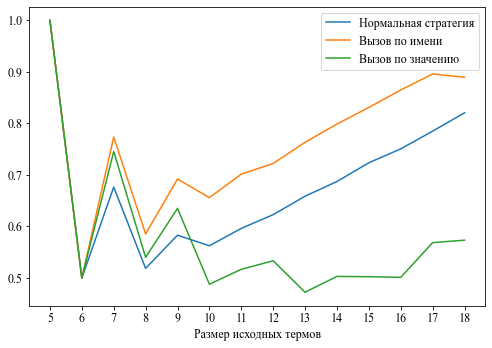

In [92]:
draw_and_save_three_lines_graph(precent_cycled_norm, precent_cycled_name, precent_cycled_val,
                               "Размер исходных термов", "Доля зацикливающихся термов среди всех термов, не имеющих нормальную форму", np.apply_along_axis(lambda x: x + cnt_to_skip, 0, norm_df['size_of_term'].unique()[:len(norm_df['size_of_term'].unique())- cnt_to_skip]),
                               "strategies/Precent_cycled_term")

## 2. Анализ приведения к нормальной форме в нормальной стратегии

In [6]:
normal_forms_df = pd.read_csv('normal_form_ratios.csv')

In [593]:
normal_forms_df[normal_forms_df['steps_count'] == 0]

,size_of_term,number_of_term,steps_count,size_biggest_term_in_steps,size_reduced,cycled_reduction,increasing_reduction,has_normal_form
0,1,1,0.0,1.0,1.0,False,False,True
1,2,1,0.0,2.0,2.0,False,False,True
2,2,2,0.0,2.0,2.0,False,False,True
3,2,3,0.0,2.0,2.0,False,False,True
4,3,1,0.0,3.0,3.0,False,False,True
...,...,...,...,...,...,...,...,...
68045386,10,62382266,0.0,10.0,10.0,False,False,True
68045394,10,62382274,0.0,10.0,10.0,False,False,True
68045395,10,62382275,0.0,10.0,10.0,False,False,True
68045396,10,62382276,0.0,10.0,10.0,False,False,True


In [594]:
normal_forms_df.shape[0]

69445532

In [597]:
1 - normal_forms_df[normal_forms_df['steps_count'] == 0].shape[0] / normal_forms_df.shape[0]

0.6401636033258411

In [4]:
def draw_and_save_one_line_graph_points(x, xlabel, ylabel, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_xlabel(xlabel, **font)
#     axes.set_ylabel(ylabel, **font)
    sns.pointplot(x=x_data, ax=axes, y=x)
#     sns.lineplot(x=x_data, ax = axes, y=x)
#     plt.legend(loc = 'best')
#     plt.legend(prop=font)

    if (output_name is not None):
        fig.tight_layout()
        fig.savefig('results/' + output_name + '.svg', bbox_inches='tight')

#### 0. Доля термов, которые уже в нормальной форме

In [8]:
precent_terms_in_nf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    precent_terms_in_nf[term_size - 1] = normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True) &
                                                                (normal_forms_df['steps_count'] == 0)].shape[0] / normal_forms_df[normal_forms_df['size_of_term'] == term_size].shape[0]

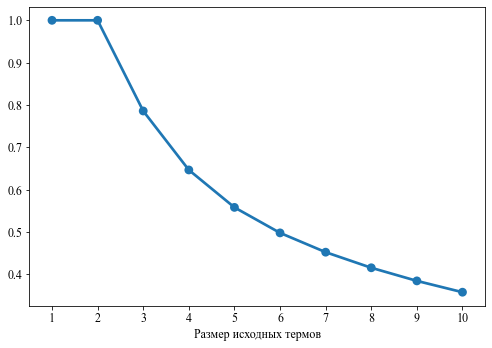

In [9]:
draw_and_save_one_line_graph_points(precent_terms_in_nf,
                               "Размер исходных термов", "Доля термов, которые уже в нормальной форме",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Precent_terms_already_in_normal_form_2")

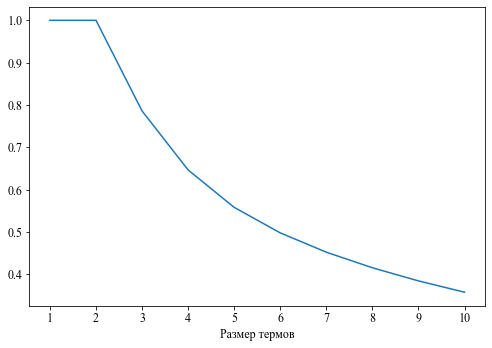

In [573]:
draw_and_save_one_line_graph(precent_terms_in_nf,
                               "Размер термов", "Доля термов, которые уже в нормальной форме",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Precent_terms_already_in_normal_form")

#### 1. Средняя длина цепочки редукций

In [461]:
average_len = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_len[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)]['steps_count'])    

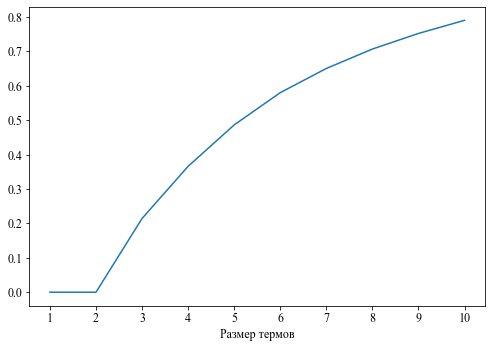

In [576]:
draw_and_save_one_line_graph(average_len,
                               "Размер термов", "Средняя длина цепочки редукций, приведших терм в нормальную форму в соответствии с нормальной стратегией",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Average_chain_length_full")

#### 2. Средняя длина цепочки редукций среди термов, которые не были уже в нормальной форме

In [11]:
average_len_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_len_notinnf[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True) &
                                                                (normal_forms_df['steps_count'] != 0)]['steps_count'])    

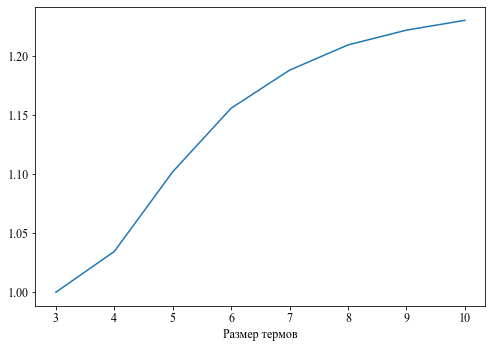

In [577]:
draw_and_save_one_line_graph(average_len_notinnf,
                               "Размер термов", "Средняя длина цепочки редукций, приведших терм в нормальную форму в соответствии с нормальной стратегией среди термов, которые не были в нормальной форме",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Average_chain_length_not_in_nf")

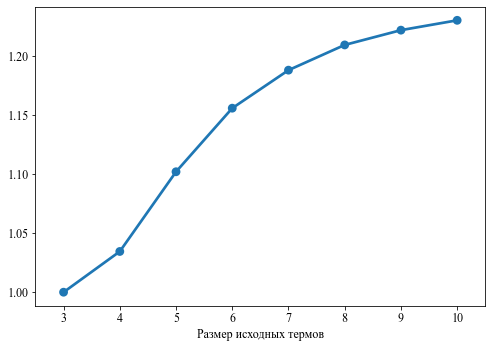

In [18]:
draw_and_save_one_line_graph_points(average_len_notinnf[2:],
                               "Размер исходных термов", "Средняя длина цепочки редукций, приведших терм в нормальную форму в соответствии с нормальной стратегией среди термов, которые не были в нормальной форме",
                                normal_forms_df['size_of_term'].unique()[2:],
                               "just_normal/Average_chain_length_not_in_nf_2")

#### 3. Средний размер редуцированных термов

In [498]:
average_reduced_size = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_reduced_size[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)]['size_reduced'])    

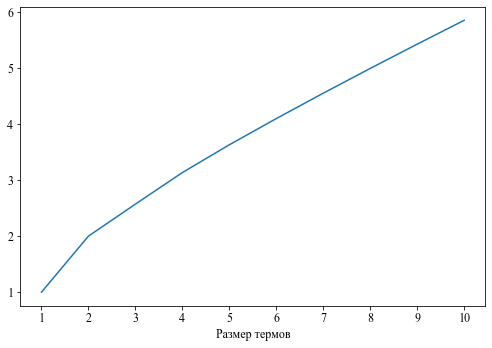

In [578]:
draw_and_save_one_line_graph(average_reduced_size,
                               "Размер термов", "Средний размер редуцированных термов",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Average_reduced_term_size_full")

#### 4. Средний размер редуцированных термов среди термов, которые были изначально не в нормальной форме

In [13]:
average_reduced_size_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_reduced_size_notinnf[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)
                                                                         &(normal_forms_df['steps_count'] != 0)]['size_reduced'])    

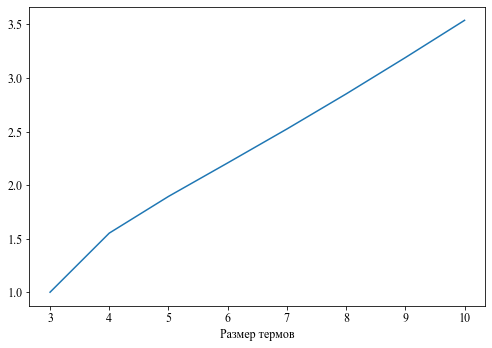

In [579]:
draw_and_save_one_line_graph(average_reduced_size_notinnf,
                               "Размер термов", "Средний размер редуцированных термов среди термов, изначально не в нормальной фомре",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Average_reduced_term_size_not_in_nf")

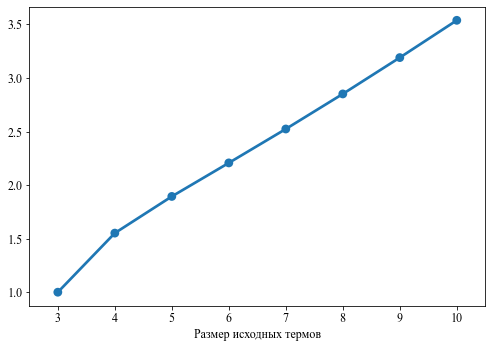

In [19]:
draw_and_save_one_line_graph_points(average_reduced_size_notinnf[2:],
                               "Размер исходных термов", "Средний размер редуцированных термов среди термов, изначально не в нормальной фомре",
                                normal_forms_df['size_of_term'].unique()[2:],
                               "just_normal/Average_reduced_term_size_not_in_nf_2")


посчитать уравнение

#### 5. Средний максимальный размер термов во время редуцирования (среди термов, которые были изначально не в нормальной форме)

In [517]:
normal_forms_df[(normal_forms_df['steps_count'] != 0) & (normal_forms_df['size_biggest_term_in_steps'] > normal_forms_df['size_of_term'])]

,size_of_term,number_of_term,steps_count,size_biggest_term_in_steps,size_reduced,cycled_reduction,increasing_reduction,has_normal_form
5282,6,4604,2.0,7.0,2.0,False,False,True
5283,6,4605,2.0,7.0,2.0,False,False,True
5284,6,4606,2.0,7.0,5.0,False,False,True
5285,6,4607,2.0,7.0,2.0,False,False,True
5286,6,4608,2.0,7.0,5.0,False,False,True
...,...,...,...,...,...,...,...,...
69445258,10,63782138,4.0,11.0,1.0,False,False,True
69445261,10,63782141,4.0,11.0,1.0,False,False,True
69445270,10,63782150,2.0,11.0,1.0,False,False,True
69445280,10,63782160,3.0,11.0,1.0,False,False,True


In [21]:
average_maxsize_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_maxsize_notinnf[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)
                                                                         &(normal_forms_df['steps_count'] != 0)]['size_biggest_term_in_steps'])    

In [545]:
def draw_and_save_one_line_graph(x, xlabel, ylabel, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_xlabel(xlabel, **font)
    axes.set_ylabel(ylabel, **font)
    sns.pointplot(x=x_data, ax = axes, y=x)
#     sns.lineplot(x=x_data, ax = axes, y=x, markers= True, style="logic", hue="logic")
#     plt.legend(loc = 'best')
#     plt.legend(prop=font)

    if (output_name is not None):
        fig.tight_layout()
        fig.savefig(output_name + '.png', bbox_inches='tight')

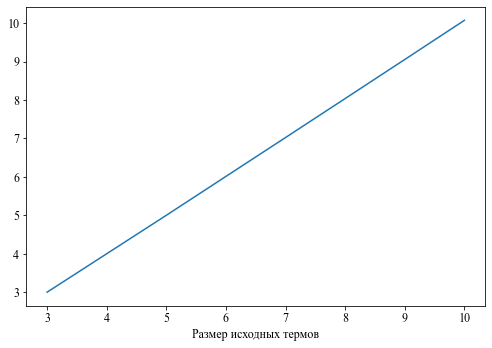

In [22]:
draw_and_save_one_line_graph(average_maxsize_notinnf,
                               "Размер исходных термов", "Средний максимальный размер терма во время редукции среди термов, изначально не в нормальной фомре",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Average_max_size_not_in_nf_2")


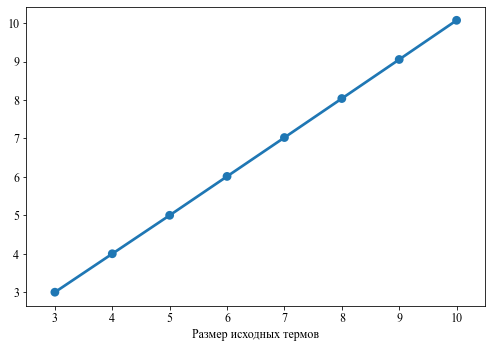

In [26]:
draw_and_save_one_line_graph_points(average_maxsize_notinnf[2:],
                               "Размер исходных термов", "Средний максимальный размер терма во время редукции среди термов, изначально не в нормальной фомре",
                                normal_forms_df['size_of_term'].unique()[2:],
                               "just_normal/Average_max_size_not_in_nf_2")

In [23]:
def draw_and_save_with_y_eq_x(x, xlabel, ylabel, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_xlabel(xlabel, **font)
#     axes.set_ylabel(ylabel, **font)
    sns.lineplot(x=x_data, ax = axes, y=x, label = 'Нормальная стратегия')
    sns.lineplot(x=range(3,11), ax = axes, y = range(3,11), label='y = x')
#     axes.set(xscale="log", yscale="log")
    plt.legend(loc = 'best')
    plt.legend(prop=font)

    if (output_name is not None):
        fig.tight_layout()
        fig.savefig('results/' + output_name + '.svg', bbox_inches='tight')

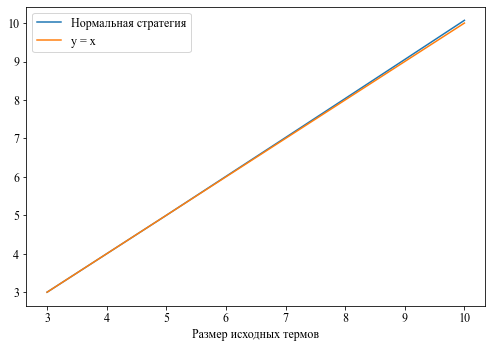

In [24]:
draw_and_save_with_y_eq_x(average_maxsize_notinnf,
                               "Размер исходных термов", "Средний максимальный размер терма во время редукции среди термов, изначально не в нормальной фомре",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Average_max_size_not_in_nf2")

#### 6. Максимальный максимальный размер термов во время редукции (среди термов, которые были изначально не в нормальной форме)

In [28]:
max_maxsize_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    max_maxsize_notinnf[term_size - 1] = np.max(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)
                                                                         &(normal_forms_df['steps_count'] != 0)]['size_biggest_term_in_steps'])    

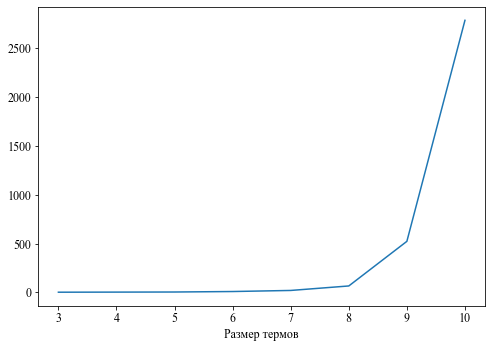

In [600]:
draw_and_save_one_line_graph( max_maxsize_notinnf,
                               "Размер термов", "Максимальный максимальный размер термов во время редукции среди термов, изначально не в нормальной фомре",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Max_max_size_full_not_in_nf")

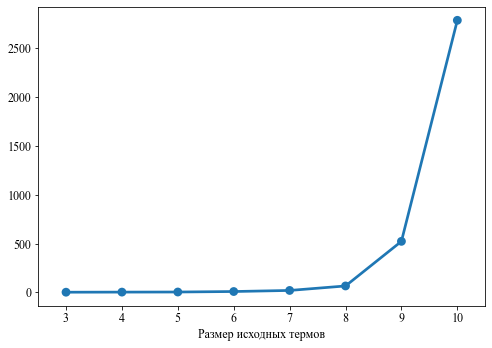

In [30]:
draw_and_save_one_line_graph_points(max_maxsize_notinnf[2:],
                               "Размер исходных термов", "Максимальный максимальный размер термов во время редукции среди термов, изначально не в нормальной фомре",
                                normal_forms_df['size_of_term'].unique()[2:],
                               "just_normal/Max_max_size_full_not_in_nf_2")

In [547]:
normal_forms_df.head(1)

,size_of_term,number_of_term,steps_count,size_biggest_term_in_steps,size_reduced,cycled_reduction,increasing_reduction,has_normal_form
0,1,1,0.0,1.0,1.0,False,False,True


In [548]:
normal_forms_df[(normal_forms_df['size_of_term'] == 9) & (normal_forms_df['size_biggest_term_in_steps'] > 500)]

,size_of_term,number_of_term,steps_count,size_biggest_term_in_steps,size_reduced,cycled_reduction,increasing_reduction,has_normal_form
5578682,9,5075003,38.0,524.0,524.0,False,False,True


#### 7. Отношение максимального размера терма во время редукции к первоначальному размеру

In [31]:
size_ratio_full_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    size_ratio_full_notinnf[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True) & (normal_forms_df['steps_count'] != 0)]
                                                      ['size_biggest_term_in_steps'] /
                                                      normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True) & (normal_forms_df['steps_count'] != 0)]
                                                      ['size_of_term'])

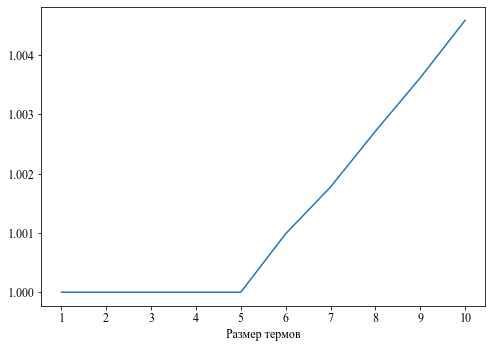

In [608]:
draw_and_save_one_line_graph(size_ratio_full_notinnf,
                               "Размер термов", "Отношение максимального размера во время редукции к размеру первоначального терма в среднем",
                                normal_forms_df['size_of_term'].unique(),
                               "size_ratio_full")

In [32]:
def draw_and_save_one_line_graph2(x, xlabel, ylabel, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_ylim(1,1.1)
    axes.set_yticks(np.arange(1,1.1,0.01))
#     axes.set(yscale="log")
    axes.set_xlabel(xlabel, **font)
#     axes.set_ylabel(ylabel, **font)
    sns.lineplot(x=x_data, ax = axes, y=x)
#     plt.legend(loc = 'best')
#     plt.legend(prop=font)

    if (output_name is not None):
        fig.tight_layout()
        fig.savefig('results/' + output_name + '.svg', bbox_inches='tight')

In [33]:
def draw_and_save_one_line_graph2_points(x, xlabel, ylabel, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_ylim(1,1.1)
    axes.set_yticks(np.arange(1,1.1,0.01))
#     axes.set(yscale="log")
    axes.set_xlabel(xlabel, **font)
#     axes.set_ylabel(ylabel, **font)
    sns.pointplot(x=x_data, ax = axes, y=x)
#     plt.legend(loc = 'best')
#     plt.legend(prop=font)

    if (output_name is not None):
        fig.tight_layout()
        fig.savefig('results/' + output_name + '.svg', bbox_inches='tight')

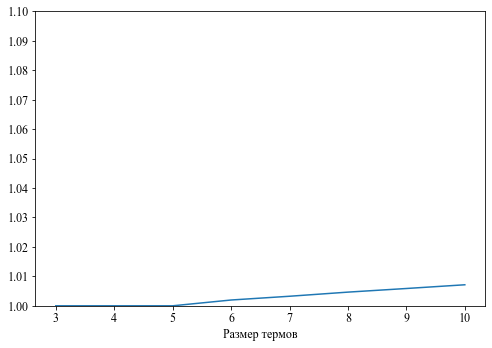

In [12]:
draw_and_save_one_line_graph2(size_ratio_full_notinnf,
                               "Размер термов", "Отношение максимального размера во время редукции к размеру первоначального терма в среднем",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Size_ratio_not_in_nf")

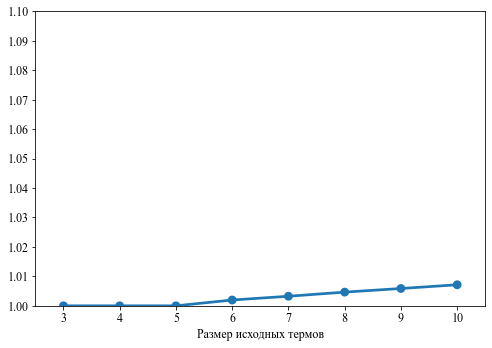

In [35]:
draw_and_save_one_line_graph2_points(size_ratio_full_notinnf[2:],
                               "Размер исходных термов", "Отношение максимального размера во время редукции к размеру первоначального терма в среднем",
                                normal_forms_df['size_of_term'].unique()[2:],
                               "just_normal/Size_ratio_not_in_nf_2")

#### 8. Доля "развертывающихся" термов среди термов без нормальной формы

In [36]:
cnt_to_skip = 4
precent_increasing_full = np.zeros(shape = len(normal_forms_df['size_of_term'].unique())- cnt_to_skip, dtype=float)

for term_size in range(cnt_to_skip, len(normal_forms_df['size_of_term'].unique())):
    precent_increasing_full[term_size - cnt_to_skip] = (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)
                                                                         &(normal_forms_df['increasing_reduction'] == True)].shape[0]
                                             ) / (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)].shape[0])

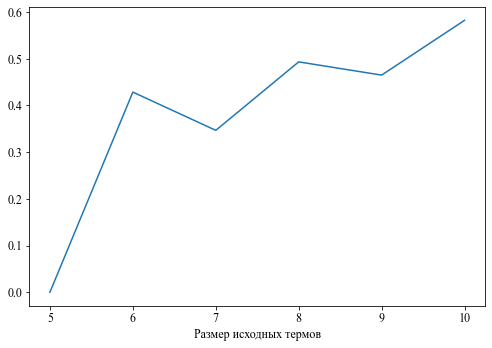

In [39]:
draw_and_save_one_line_graph(precent_increasing_full,
                               "Размер исходных термов", "Доля развертывающихся термов среди термов без нормальной формы",
                                np.apply_along_axis(lambda x: x + cnt_to_skip, 0, normal_forms_df['size_of_term'].unique()[:len(normal_forms_df['size_of_term'].unique())- cnt_to_skip]),
                               "just_normal/Precent_increasing_full")

In [691]:
precent_increasing_full

array([0.5       , 0.5       , 0.35526316, 0.49404762, 0.4650514 ,
       0.58232807])

In [692]:
precent_cycled_full

array([1.        , 0.57142857, 0.65333333, 0.50670641, 0.53502717,
       0.41767781])

#### 9. Доля "зацикливающихся" термов среди термов без нормальной формы

In [37]:

precent_cycled_full = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()) - cnt_to_skip, dtype=float)

for term_size in range(cnt_to_skip, len(normal_forms_df['size_of_term'].unique())):
    precent_cycled_full[term_size - cnt_to_skip] = (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)
                                                                         &(normal_forms_df['cycled_reduction'] == True)].shape[0]
                                             ) / (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)].shape[0])


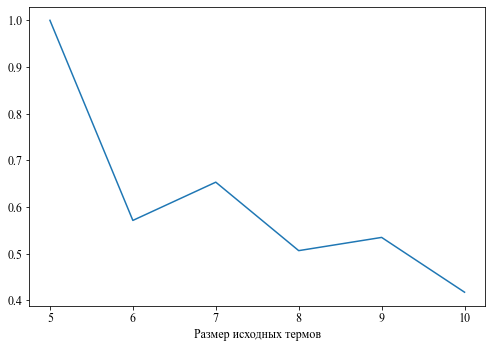

In [38]:
draw_and_save_one_line_graph(precent_cycled_full,
                               "Размер исходных термов", "Доля зацикливающихся термов среди термов без нормальной формы",
                                np.apply_along_axis(lambda x: x + cnt_to_skip, 0, normal_forms_df['size_of_term'].unique()[:len(normal_forms_df['size_of_term'].unique())- cnt_to_skip]),
                               "just_normal/Precent_cycled_full")

#### Распределение длин цепочек редукций среди термов размера 10

In [7]:
length_to_skip = 20000

In [8]:
data_1 = normal_forms_df[(normal_forms_df['has_normal_form'] == True) &(normal_forms_df['steps_count'] != 0)
               &(normal_forms_df['size_of_term'] == 10)]

In [9]:
info = data_1.steps_count.value_counts() > length_to_skip
dict_info = info.to_dict()

In [10]:
data_filtered = data_1[data_1['steps_count'].map(dict_info)]

In [11]:
data_filtered['steps_count'].value_counts()

1.0    33621209
2.0     5851838
3.0     1086717
4.0      223893
5.0       72995
6.0       28397
Name: steps_count, dtype: int64

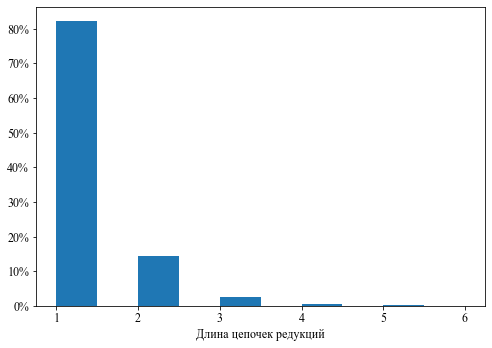

In [19]:
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
plt.hist(x=data_filtered['steps_count'], weights=np.ones(len(data_filtered['steps_count'])) / len(data_filtered['steps_count']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Длина цепочек редукций", **font)
plt.tight_layout()
plt.savefig('results/just_normal/' + 'Steps_count_distrib' + '.svg', bbox_inches='tight')
plt.show()